In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras import optimizers

In [ ]:
df = pd.read_csv("/content/crop_train.csv")

In [ ]:
df.head()

,State,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
0,Chhattisgarh,balod,2011,Kharif,Arhar/Tur,607,290.0,25.5025,9.856148,83.805,2.11
1,Chhattisgarh,balod,2011,Kharif,Horse-gram,288,102.0,25.5025,9.856148,83.805,2.11
2,Chhattisgarh,balod,2011,Kharif,Jowar,11,8.0,25.5025,9.856148,83.805,2.11
3,Chhattisgarh,balod,2011,Kharif,Maize,125,149.0,25.5025,9.856148,83.805,2.11
4,Chhattisgarh,balod,2011,Kharif,Mesta,8,15.0,25.5025,9.856148,83.805,2.11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        10709 non-null  object 
 1   District     10709 non-null  object 
 2   Year         10709 non-null  int64  
 3   Season       10709 non-null  object 
 4   Crop         10709 non-null  object 
 5   Area         10709 non-null  int64  
 6   Production   10368 non-null  float64
 7   Temperature  10709 non-null  float64
 8   Rainfall     10709 non-null  float64
 9   Humidity     10709 non-null  float64
 10  Wind Speed   10709 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 920.4+ KB


In [ ]:
df.describe()

,Year,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
count,10709.000000,10709.000000,1.036800e+04,10709.000000,10709.000000,10709.000000,10709.000000
mean,2007.727426,7754.194042,9.736874e+03,24.647882,4.631773,68.128860,1.851537
std,4.396948,38147.615088,5.902254e+04,2.698674,3.440207,15.337771,0.349847
min,2000.000000,1.000000,0.000000e+00,17.564000,0.078581,24.520000,0.916000
25%,2004.000000,32.000000,2.800000e+01,22.224000,0.672380,55.396000,1.528000
50%,2008.000000,230.000000,1.740000e+02,25.330000,4.335726,67.140739,1.925000
75%,2012.000000,1303.000000,9.222500e+02,26.370000,7.627804,83.560000,2.107290
max,2014.000000,545965.000000,2.129180e+06,32.356667,11.850688,88.922500,2.700000


In [ ]:
type(np.unique(df['Production'])[-1])

numpy.float64

In [ ]:
df[(np.isnan(df['Production']))]

,State,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
74,Chhattisgarh,balod,2013,Kharif,Other Kharif pulses,141,NaN,25.3575,10.151371,87.4975,2.4050
91,Chhattisgarh,balod,2013,Rabi,Safflower,1,NaN,21.3720,0.108918,57.5540,1.4400
121,Chhattisgarh,balod,2014,Rabi,Other Rabi pulses,1,NaN,20.4540,0.520286,62.9440,1.4180
141,Chhattisgarh,baloda bazar,2011,Kharif,Mesta,17,NaN,26.0800,9.382960,83.2575,1.8850
222,Chhattisgarh,baloda bazar,2013,Kharif,Sunflower,60,NaN,26.1350,10.084793,85.7350,1.9475
...,...,...,...,...,...,...,...,...,...,...,...
10599,Chhattisgarh,surguja,2012,Kharif,Jute,21,NaN,24.5850,9.418030,83.5825,1.7175
10636,Chhattisgarh,surguja,2013,Kharif,Jute,15,NaN,24.9050,10.079675,86.0000,1.8550
10641,Chhattisgarh,surguja,2013,Kharif,Other Kharif pulses,136,NaN,24.9050,10.079675,86.0000,1.8550
10674,Chhattisgarh,surguja,2014,Kharif,Jute,13,NaN,25.1150,7.945099,82.3250,1.8700


In [ ]:
sum(df['Production'].isna())

341

In [ ]:
df.fillna(0,axis=1,inplace=True)

In [ ]:
sum(df['Production'].isna())

0

In [ ]:
import seaborn as sns

In [ ]:
df.describe().iloc[:,2]

count    1.070900e+04
mean     9.426829e+03
std      5.810030e+04
min      0.000000e+00
25%      2.200000e+01
50%      1.540000e+02
75%      8.660000e+02
max      2.129180e+06
Name: Production, dtype: float64

In [ ]:
len(np.unique(df['District']))

27

In [ ]:
season=pd.get_dummies(df['Season'])

In [ ]:
crop=pd.get_dummies(df['Crop'])

In [ ]:
df.drop(['Crop','Season','District','State'],axis=1,inplace=True)

In [ ]:
yield_df=pd.concat([season,crop],axis=1)

In [ ]:
yield_df=pd.concat([df,yield_df],axis=1)

In [ ]:
yield_df.head()

,Year,Area,Production,Temperature,Rainfall,Humidity,Wind Speed,Kharif,Rabi,Summer,Whole Year,Arhar/Tur,Bajra,Banana,Barley,Castor seed,Coconut,Coriander,Cotton(lint),Dry chillies,Dry ginger,Garlic,Gram,Groundnut,Guar seed,Horse-gram,Jowar,Jute,Khesari,Linseed,Maize,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Other Rabi pulses,Other Kharif pulses,Papaya,Peas & beans (Pulses),Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Sannhamp,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tobacco,Turmeric,Urad,Wheat,other misc. pulses
0,2011,607,290.0,25.5025,9.856148,83.805,2.11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2011,288,102.0,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,11,8.0,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011,125,149.0,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011,8,15.0,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=yield_df.drop(['Production'],axis=1)

In [ ]:
X.head()

,Year,Area,Temperature,Rainfall,Humidity,Wind Speed,Kharif,Rabi,Summer,Whole Year,Arhar/Tur,Bajra,Banana,Barley,Castor seed,Coconut,Coriander,Cotton(lint),Dry chillies,Dry ginger,Garlic,Gram,Groundnut,Guar seed,Horse-gram,Jowar,Jute,Khesari,Linseed,Maize,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Other Rabi pulses,Other Kharif pulses,Papaya,Peas & beans (Pulses),Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Sannhamp,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tobacco,Turmeric,Urad,Wheat,other misc. pulses
0,2011,607,25.5025,9.856148,83.805,2.11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2011,288,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,11,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011,125,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011,8,25.5025,9.856148,83.805,2.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=yield_df['Production']

In [ ]:
Y

0         290.0
1         102.0
2           8.0
3         149.0
4          15.0
          ...  
10704    3904.0
10705    6572.0
10706    1435.0
10707       2.0
10708     145.0
Name: Production, Length: 10709, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (8031, 56) (8031,)
Test (2678, 56) (2678,)


Correlation Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [ ]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.664196
Feature 1: 19572.170258
Feature 2: 8.480739
Feature 3: 129.169233
Feature 4: 121.997710
Feature 5: 31.357955
Feature 6: 170.598452
Feature 7: 40.091678
Feature 8: 0.065251
Feature 9: 63.128764
Feature 10: 3.982543
Feature 11: 1.499766
Feature 12: 3.711751
Feature 13: 2.166651
Feature 14: 1.749397
Feature 15: 0.465548
Feature 16: 5.062802
Feature 17: 1.070876
Feature 18: 5.139978
Feature 19: 4.768450
Feature 20: 3.952871
Feature 21: 0.058602
Feature 22: 2.950728
Feature 23: 0.024329
Feature 24: 7.012624
Feature 25: 4.605610
Feature 26: 0.539262
Feature 27: 0.682435
Feature 28: 4.037694
Feature 29: 0.083843
Feature 30: 4.275628
Feature 31: 4.533370
Feature 32: 10.311553
Feature 33: 3.693186
Feature 34: 3.476680
Feature 35: 4.722778
Feature 36: 5.258893
Feature 37: 0.195977
Feature 38: 4.795325
Feature 39: 3.220499
Feature 40: 3.225899
Feature 41: 4.306151
Feature 42: 10162.097303
Feature 43: 2.789894
Feature 44: 4.953833
Feature 45: 5.610128
Feature 46: 3.101178
Featu

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


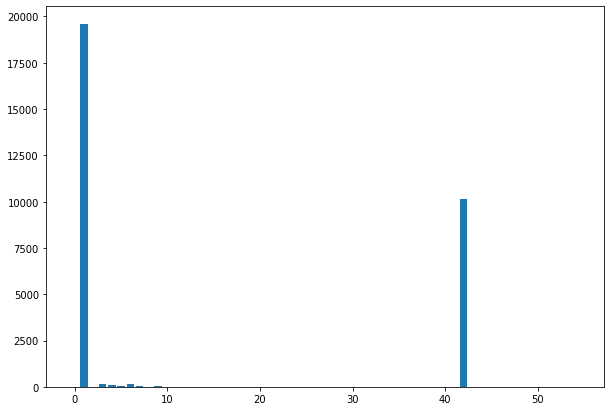

In [ ]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.figure(figsize=(10,7))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.000000
Feature 1: 1.122748
Feature 2: 0.060085
Feature 3: 0.052260
Feature 4: 0.060969
Feature 5: 0.043684
Feature 6: 0.028727
Feature 7: 0.013902
Feature 8: 0.005078
Feature 9: 0.004590
Feature 10: 0.026450
Feature 11: 0.010459
Feature 12: 0.018444
Feature 13: 0.009390
Feature 14: 0.018746
Feature 15: 0.009140
Feature 16: 0.013228
Feature 17: 0.008200
Feature 18: 0.013155
Feature 19: 0.016659
Feature 20: 0.012634
Feature 21: 0.012591
Feature 22: 0.015515
Feature 23: 0.002947
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.002059
Feature 27: 0.022989
Feature 28: 0.018441
Feature 29: 0.021428
Feature 30: 0.005191
Feature 31: 0.010144
Feature 32: 0.025980
Feature 33: 0.010726
Feature 34: 0.025195
Feature 35: 0.013204
Feature 36: 0.021547
Feature 37: 0.000000
Feature 38: 0.019572
Feature 39: 0.009718
Feature 40: 0.000000
Feature 41: 0.012504
Feature 42: 0.107182
Feature 43: 0.008893
Feature 44: 0.024911
Feature 45: 0.012283
Feature 46: 0.017447
Feature 47: 0.003963
Fe

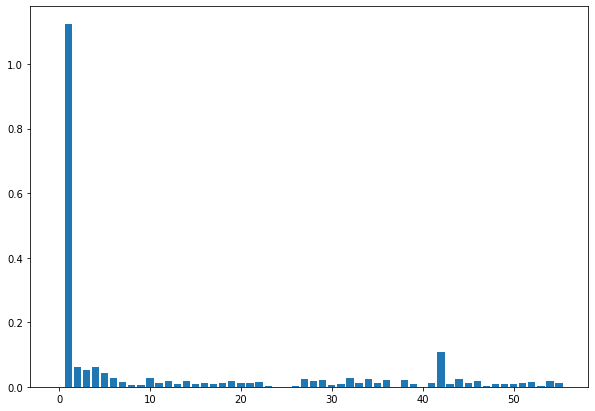

In [ ]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.figure(figsize=(10,7))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Fitting algorithms by using all the features and using MAE for validation

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [ ]:
clf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

2498.274565596216

Using Scaled Data

In [ ]:
scaler = StandardScaler()
x_trainscaled = scaler.fit_transform(x_train)
x_testscaled = scaler.transform(x_test)

In [ ]:
# randomForest on scaled data:
clf1=RandomForestRegressor()
clf1.fit(x_trainscaled,y_train)

RandomForestRegressor()

In [ ]:
ypredranscaled=clf1.predict(x_testscaled)
mae_scaled= mean_absolute_error(y_test,ypredranscaled)

In [ ]:
mae_scaled

2464.712638785163

Text(0, 0.5, 'Mean Absolute Error')

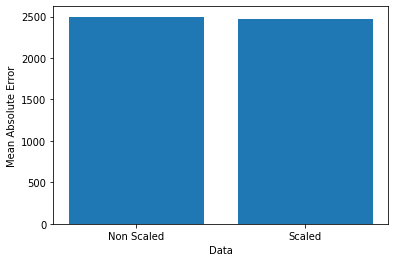

In [ ]:
random_root_mean_squared_list = [mae, mae_scaled]
namerandom = ['Non Scaled', 'Scaled']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,random_root_mean_squared_list)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Random Forest Regressor on Selected Features

Model built using Mutual Information Features

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
rfc = RandomForestRegressor()
para_grid = {
    'n_estimators' : [20, 50, 100], 
}
cv_rfc = GridSearchCV(estimator = rfc, param_grid = para_grid, cv = 3)
cv_rfc.fit(x_trainscaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [20, 50, 100]})

In [ ]:
yp1=cv_rfc.predict(x_testscaled)
mae1=mean_absolute_error(yp1,y_test)
mae1

2592.644161065472

In [ ]:
from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(x_train, y_train)
ypredlinear = clf_linear.predict(x_test)
maelinear=mean_absolute_error(y_test, ypredlinear)
print(maelinear)
# on scaled data:
clf_linearscaled = LinearRegression()
clf_linearscaled.fit(x_trainscaled, y_train)
ypredlinearscaled = clf_linearscaled.predict(x_testscaled)
maelinearscaled=mean_absolute_error(y_test, ypredlinearscaled)
print(maelinearscaled)

5844.2102609678
1088318631589.9744


Text(0, 0.5, 'Mean Absolute Error')

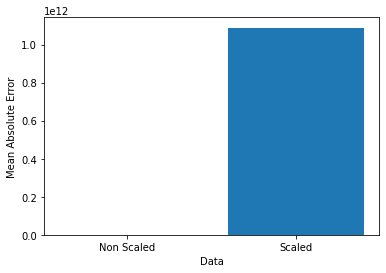

In [ ]:
linearmeanlist = [maelinear, maelinearscaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,linearmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
#KNN neighbor
from sklearn.neighbors import KNeighborsRegressor
clfKNN = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN.fit(x_train, y_train)
ypredknn = clfKNN.predict(x_test)
knnmae=mean_absolute_error(y_test, ypredknn)
print(knnmae)

4100.36282922579


2976.5988262384863


Text(0, 0.5, 'Mean Absolute Error')

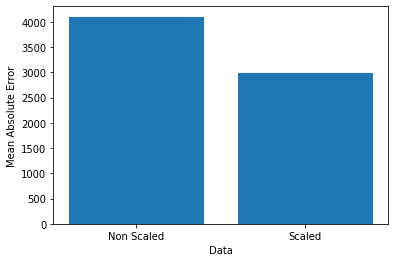

In [ ]:
clfKNN1 = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN1.fit(x_trainscaled, y_train)
ypredknnscaled = clfKNN1.predict(x_testscaled)
knnmaescaled=mean_absolute_error(y_test, ypredknnscaled)
print(knnmaescaled)
knnmeanlist = [knnmae, knnmaescaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,knnmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
# testing on diff neighbors:
x_ax = []
y_ax = []
for i in range(1, 50, 2):
    clfk = KNeighborsRegressor(n_neighbors = i, algorithm='ball_tree')
    clfk.fit(x_trainscaled, y_train)
    ypredk = clfk.predict(x_testscaled)
    mae = mean_absolute_error(y_test, ypredk)
    print(mae)
    x_ax.append(i)
    y_ax.append(mae)

3443.3778902165795
2976.5988262384863
2855.0206833457805
2914.1918772004697
2959.56165090034
3024.2555804874737
3121.4138240363072
3204.2716168782677
3257.8847214778366
3324.429303289965
3410.7030440271706
3543.996586842874
3641.9863293502617
3709.1957891461293
3798.419570832582
3819.174958322291
3814.976459931654
3859.3915891390157
3903.1669825202353
3929.2680589226557
3946.411579354815
3976.978659621029
4001.299349016679
4027.6918590405667
4049.4157725838654


Text(0, 0.5, 'Mean Absolute Error')

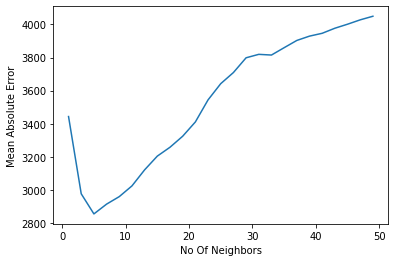

In [ ]:
plt.plot(x_ax,y_ax)
plt.xlabel('No Of Neighbors')
plt.ylabel('Mean Absolute Error')

In [ ]:
from sklearn.linear_model import SGDRegressor
clfsgd1=SGDRegressor()
clfsgd1.fit(x_trainscaled,y_train)

SGDRegressor()

In [ ]:
ypredsgdscaled=clfsgd1.predict(x_testscaled)
maesgdscaled=mean_absolute_error(ypredsgdscaled,y_test)
print(maesgdscaled)
clfsgd2=SGDRegressor()
clfsgd2.fit(x_train,y_train)
ypredsgd=clfsgd2.predict(x_test)
maesgd=mean_absolute_error(ypredsgd,y_test)
print(maesgd)

66548.99238092538
9.664195009985814e+16


Text(0, 0.5, 'Mean Absolute Error')

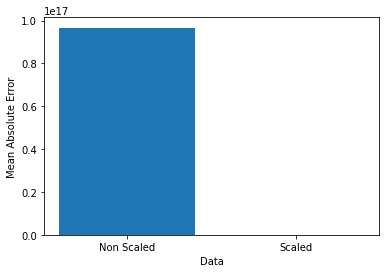

In [ ]:
sgdmeanlist = [maesgd, maesgdscaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,sgdmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = 56, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_trainscaled, y_train, epochs=200, batch_size=64)

Epoch 1/200
126/126 [==============================] - 3s 5ms/step - loss: 7370.0088 - accuracy: 0.0296
Epoch 2/200
126/126 [==============================] - 1s 4ms/step - loss: 3572.0847 - accuracy: 0.0296
Epoch 3/200
126/126 [==============================] - 1s 5ms/step - loss: 3216.7561 - accuracy: 0.0298
Epoch 4/200
126/126 [==============================] - 1s 4ms/step - loss: 3018.8215 - accuracy: 0.0298
Epoch 5/200
126/126 [==============================] - 1s 5ms/step - loss: 2868.3953 - accuracy: 0.0298
Epoch 6/200
126/126 [==============================] - 1s 5ms/step - loss: 2767.4260 - accuracy: 0.0298
Epoch 7/200
126/126 [==============================] - 1s 5ms/step - loss: 2715.4502 - accuracy: 0.0298
Epoch 8/200
126/126 [==============================] - 1s 5ms/step - loss: 2802.6394 - accuracy: 0.0299
Epoch 9/200
126/126 [==============================] - 1s 5ms/step - loss: 2575.1931 - accuracy: 0.0298
Epoch 10/200
126/126 [==============================] - 1s 5ms/s

Text(0, 0.5, 'Mean Absolute Error')

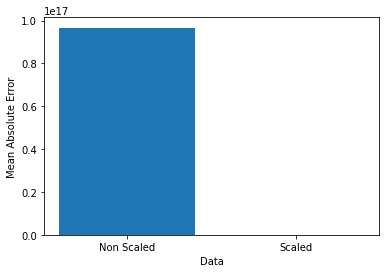

In [ ]:
plt.bar(namerandom,sgdmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")


In [ ]:
maesgd,maesgdscaled

(9.664195009985814e+16, 66548.99238092538)

In [ ]:
meanlist = [maelinear,knnmae,]
name = ['Linear Regression', 'KNN']

Text(0, 0.5, 'Mean Absolute Error')

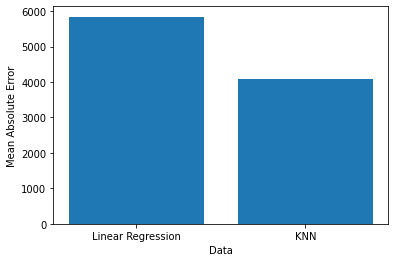

In [ ]:
plt.bar(name,meanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
meanlistscaled = [maelinearscaled,maesgdscaled,knnmaescaled]
name = ['Linear Regression','SGD','KNN']

Text(0, 0.5, 'Mean Absolute Error')

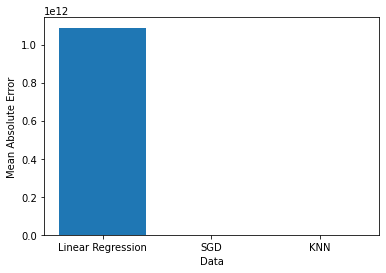

In [ ]:
plt.bar(name,meanlistscaled)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
num=[]
for i in range(x_testscaled.shape[0]):
    num.append(i+1)


Text(0, 0.5, 'Production')

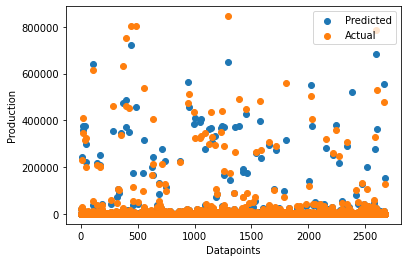

In [ ]:
plt.scatter(num,ypredranscaled,label="Predicted")
plt.scatter(num,y_test,label="Actual")
plt.legend()
plt.xlabel("Datapoints")
plt.ylabel("Production")